# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows_data = soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows

# source 01 to loop through html tables
for r in rows_data:
    cols = r.find_all('td')
    cols = [c.text.strip() for c in cols]
    data_list.append([c for c in cols if c])

In [7]:
# check data
# data_list

In [8]:
#find headings
table = soup.find('table', class_='table')
headings = table.find_all('th')

headers = []
for h in headings:
    titles = h.text
    headers.append(titles)

#check data
# headers

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_list, columns = headers)

In [10]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

#error from changing to int so change to float first then int
mars_df['sol'] = mars_df['sol'].astype(float)
mars_df['sol'] = mars_df['sol'].astype(int)

mars_df['ls'] = mars_df['ls'].astype(float)
mars_df['ls'] = mars_df['ls'].astype(int)

mars_df['month'] = mars_df['month'].astype(float)
mars_df['month'] = mars_df['month'].astype(int)

mars_df['min_temp'] = mars_df['min_temp'].astype(float)

mars_df['pressure'] = mars_df['pressure'].astype(float)

In [13]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?

#source 02 to find value counts
#source 03 to sort index
months = mars_df.month.value_counts().sort_index()
months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [15]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_df['sol'].nunique()
martian_days

1867

In [16]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_df['min_temp'].groupby(mars_df['month']).mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

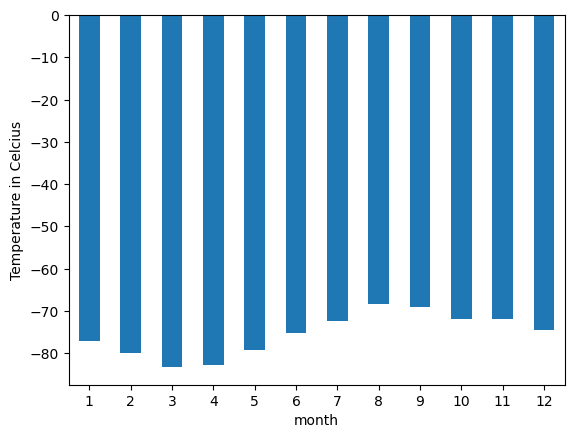

In [17]:
# Plot the average temperature by month
avg_low_temp.plot.bar(rot=0, xlabel='month', ylabel='Temperature in Celcius')
plt.show()

In [18]:
# Identify the coldest and hottest months in Curiosity's location

# #source 04 finding unique values from another column
warm_month = avg_low_temp.idxmax()
warm_month_temp = avg_low_temp.max()

cold_month = avg_low_temp.idxmin()
cold_month_temp = avg_low_temp.min()

print(f' Warmest month: {warm_month} with an Average Temperature: {round(warm_month_temp, 2)}')
print(f' Coldest month: {cold_month} with an Average Temperature: {round(cold_month_temp, 2)}')

 Warmest month: 8 with an Average Temperature: -68.38
 Coldest month: 3 with an Average Temperature: -83.31


In [19]:
# 4. Average pressure by Martian month
avg_pressure = mars_df['pressure'].groupby(mars_df['month']).mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

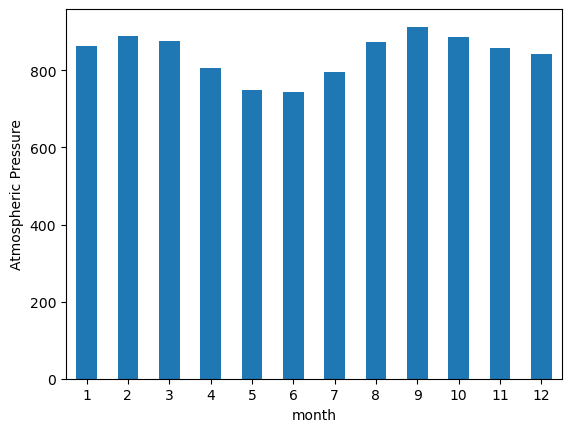

In [20]:
# Plot the average pressure by month
avg_pressure.plot.bar(rot=0, xlabel='month', ylabel='Atmospheric Pressure')
plt.show()

In [21]:
# Identify the lowest and the highest atmospheric pressure on Mars

high_month = avg_pressure.idxmax()
high_month_pressure = avg_pressure.max()

low_month = avg_pressure.idxmin()
low_month_pressure = avg_pressure.min()

print(f'Highest Pressure Month: {high_month} with an Average Temperature: {round(high_month_pressure, 2)}')
print(f'Lowest Pressure Month: {low_month} with an Average Temperature: {round(low_month_pressure, 2)}')

Highest Pressure Month: 9 with an Average Temperature: 913.31
Lowest Pressure Month: 6 with an Average Temperature: 745.05


In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# find original sun longitude
original_ls = mars_df['ls'].loc[0]

#find the next value that matches the original ls to find the next year
next_ls = mars_df.loc[mars_df['ls']==original_ls]

# find the first value where ls  = original_ls
intial_date = next_ls['terrestrial_date'].loc[0]

# find the next value where ls = intial_date
after_one_myear = next_ls['terrestrial_date'].iloc[1]

#calculate how many terrestial days are in a Martian year
one_martian_year = after_one_myear - intial_date

# print results
print(f'One Martian Year is ({one_martian_year}) Terrestial (Earth) Days')

One Martian Year is (686 days 00:00:00) Terrestial (Earth) Days


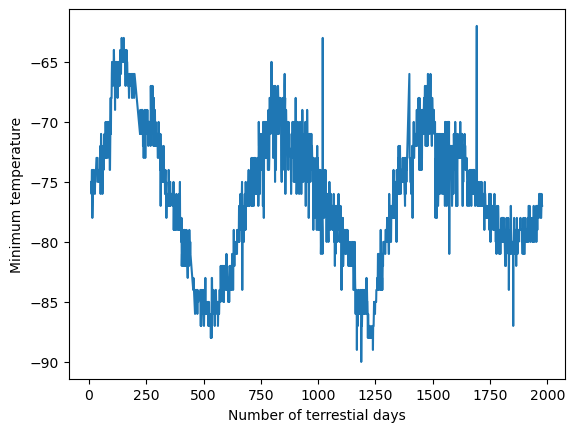

In [23]:
# Visually estimate the result by plotting the daily minimum temperature.
plt.plot(mars_df['sol'], mars_df['min_temp'])
plt.xlabel('Number of terrestial days')
plt.ylabel('Minimum temperature')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
mars_df.to_csv('mars_weather.csv')

In [25]:
browser.quit()